In [1]:
import pandas as pd

In [2]:
metrics_df = pd.read_csv('../data/camel.csv')
method_df = pd.read_csv('../data/camel_filtered_data_vec_in2.csv', header=0)

C:\Users\masak\AppData\Local\Temp\ipykernel_48216\170637198.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  metrics_df = pd.read_csv('../data/camel.csv')


In [3]:
len(method_df)

65867

In [4]:
columns = ["commit_hash", "ns", "nd", "nf", "entropy", "la", "ld", "lt", "ndev", "age", "nuc", "exp", "rexp", "sexp"]
metrics_df2 = metrics_df[columns]
metrics_df2.head()

,commit_hash,ns,nd,nf,entropy,la,ld,lt,ndev,age,nuc,exp,rexp,sexp
0,179b7ece6358193accd5759d5e307574b395a37d,1.0,1.0,1.0,0.000000,1.0,1.0,6309.000000,156.0,0.054282,1.0,7512.0,235.300275,3277.0
1,e2d6c518df53fa0d06a7d308acff377993e80278,1.0,3.0,29.0,4.608379,102.0,72.0,72.068966,15.0,232.352972,3.0,232.0,7.524554,170.0
2,72bc6b0783cca7197f98911c2e88506789e0b960,1.0,1.0,1.0,0.000000,1.0,1.0,6309.000000,156.0,0.050752,1.0,7511.0,235.209607,3276.0
3,630f1b90c8b007b62b514f579a2b3fca74fbc5d2,1.0,1.0,1.0,0.000000,1.0,1.0,6309.000000,156.0,0.093194,1.0,7510.0,237.061279,3275.0
4,574012e334254dd94673745e44247a6e42361760,1.0,1.0,1.0,0.000000,1.0,1.0,233.000000,4.0,145.129907,1.0,161.0,17.907580,4.0


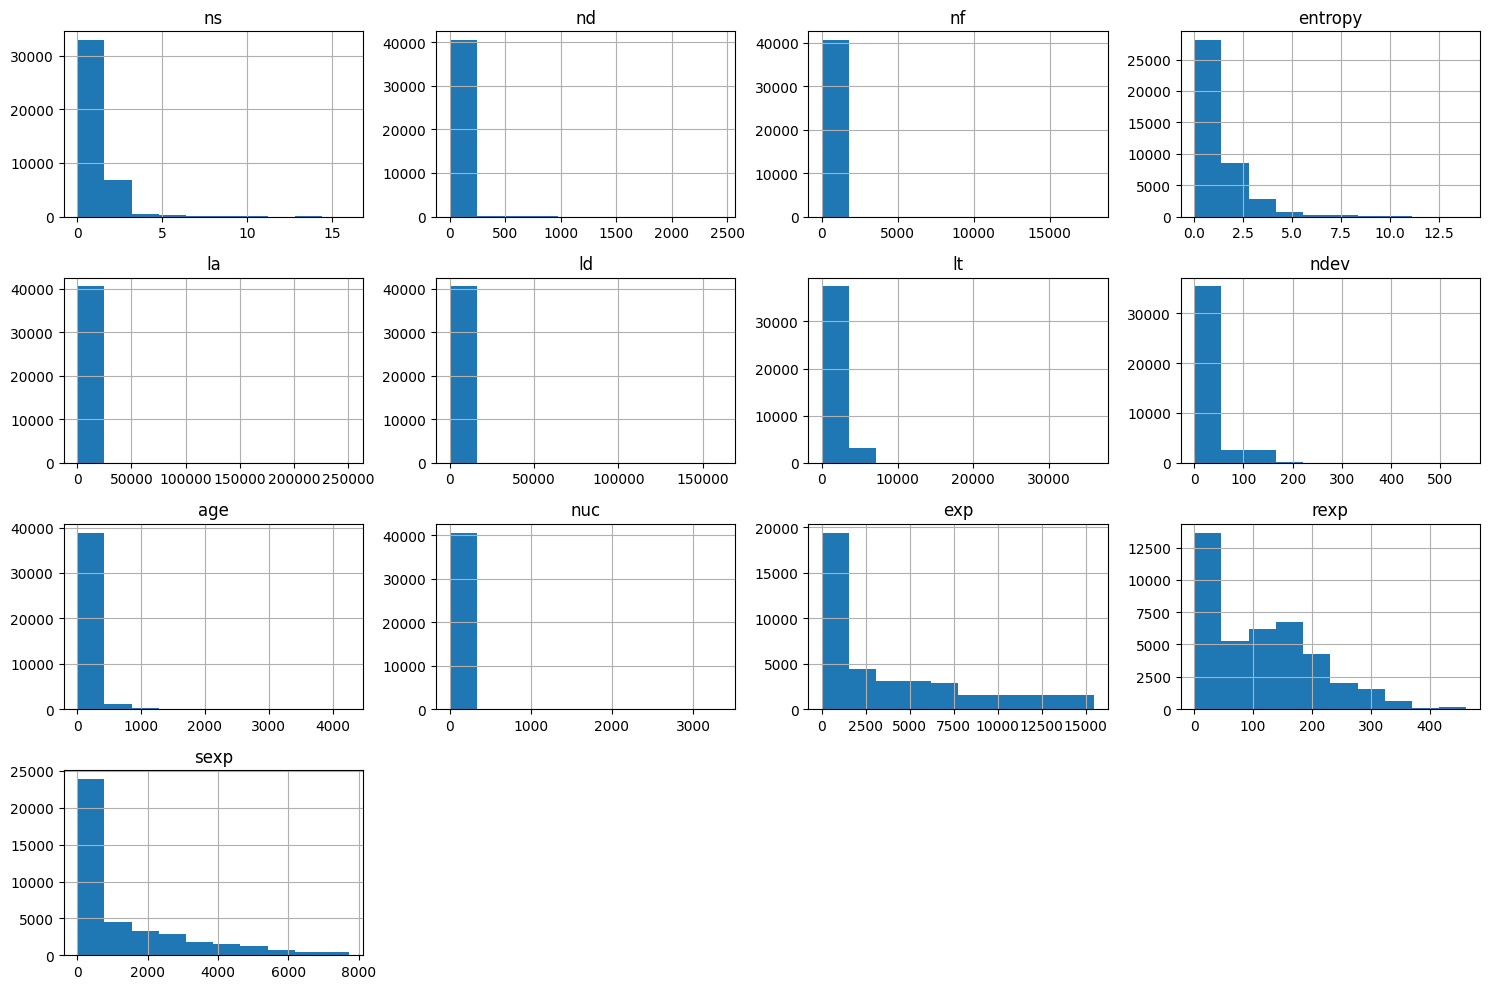

In [5]:
import matplotlib.pyplot as plt
metrics_df2.hist(bins=10, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [6]:
import numpy as np
metrics_df2[columns[1:]] = metrics_df2[columns[1:]].apply(lambda x: np.log1p(x))

C:\Users\masak\AppData\Local\Temp\ipykernel_48216\998516907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_df2[columns[1:]] = metrics_df2[columns[1:]].apply(lambda x: np.log1p(x))


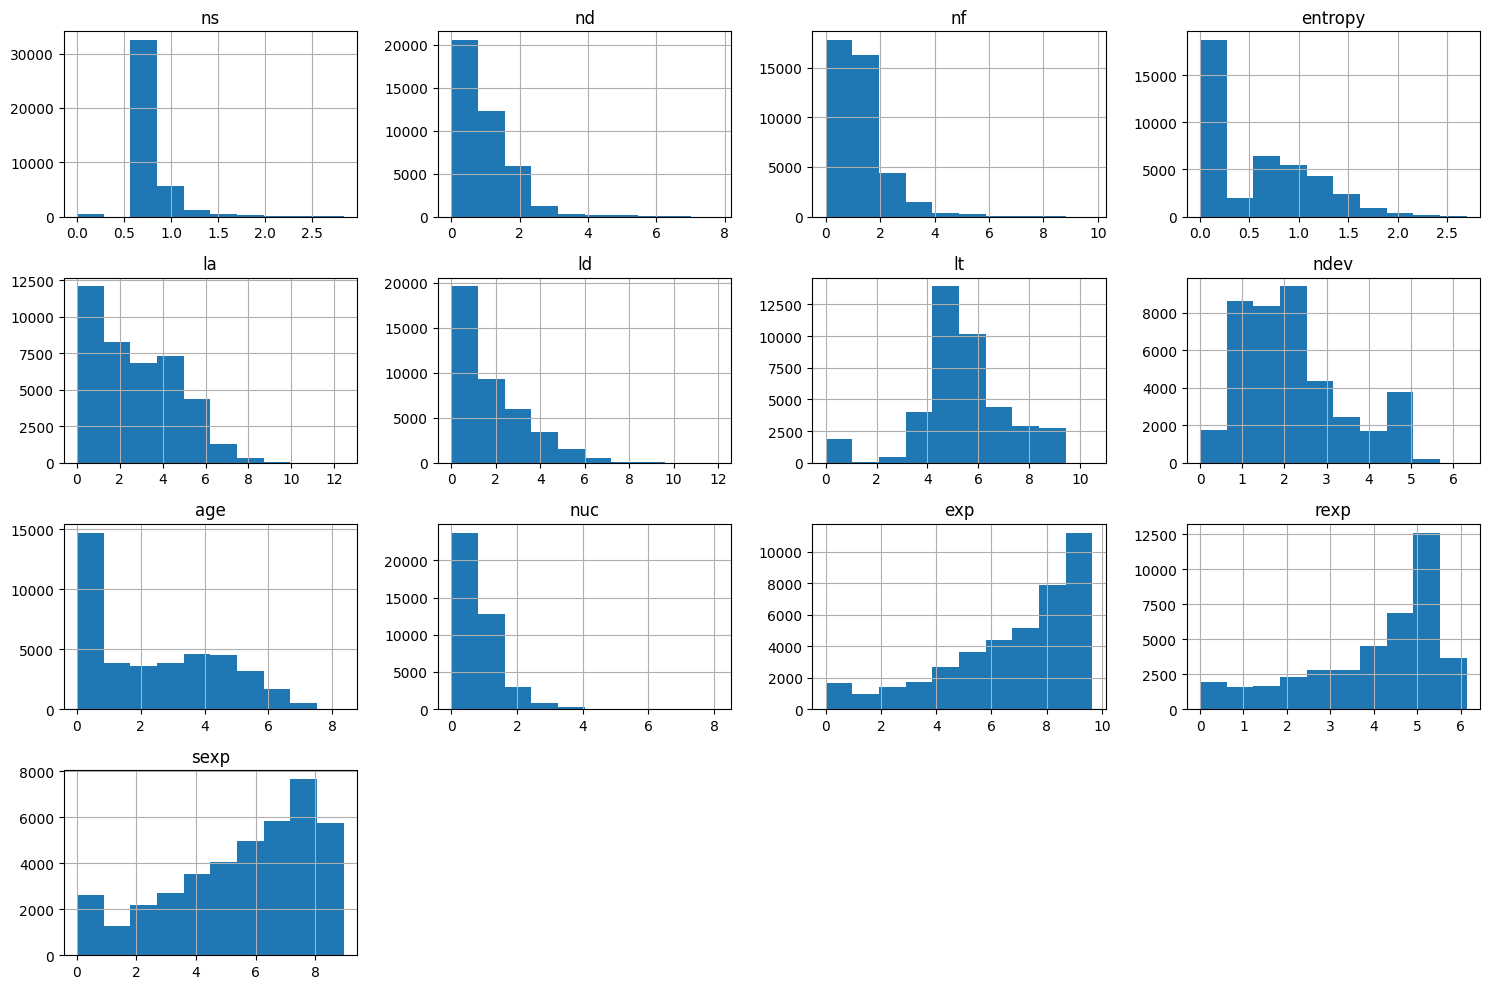

In [7]:
import matplotlib.pyplot as plt
metrics_df2.hist(bins=10, figsize=(15, 10))
plt.tight_layout()
plt.show()

C:\Users\masak\AppData\Local\Temp\ipykernel_48216\838424863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_df2[columns[1:]] = scaler.fit_transform(metrics_df2[columns[1:]])


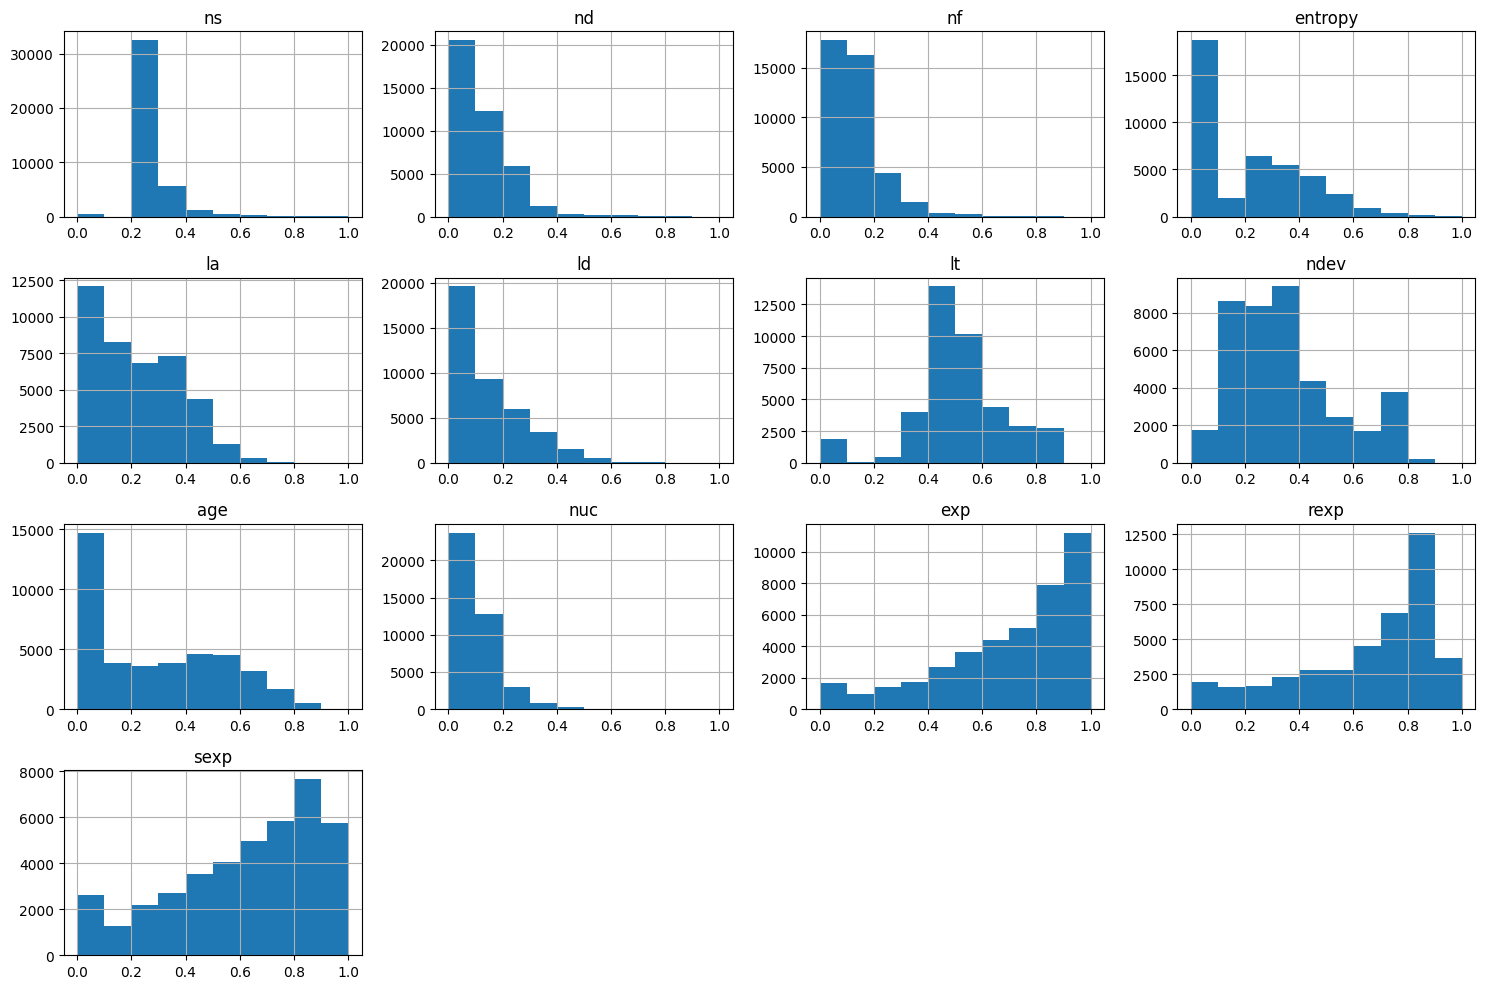

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
metrics_df2[columns[1:]] = scaler.fit_transform(metrics_df2[columns[1:]])
import matplotlib.pyplot as plt
metrics_df2.hist(bins=10, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [9]:
len(method_df)

65867

In [10]:
len(metrics_df2)

40576

In [11]:
merged_df = pd.merge(method_df, metrics_df2, left_on='commit_id', right_on='commit_hash', how='inner')

In [12]:
len(merged_df)

65812

In [13]:
merged_df['la'].value_counts()

la
0.784557    10853
0.798161    10757
0.718116     4147
0.000000     1552
0.602397      544
            ...  
0.521048        1
0.753010        1
0.531354        1
0.805026        1
0.540294        1
Name: count, Length: 1002, dtype: int64

In [14]:
merged_df = merged_df.drop(columns="commit_hash")
merged_df.head()

,commit_id,snippet,is_defect,kinds,snippet_vec,ns,nd,nf,entropy,la,ld,lt,ndev,age,nuc,exp,rexp,sexp
0,a4701ac4bf5b50810914796e284b0e3f78a240bc,public static <E> Predicate<E> or(final Predic...,True,train,"[-0.00199335184879601, -0.0005455845384858549,...",0.244651,0.229564,0.244837,0.501698,0.401912,0.321104,0.389371,0.109724,0.006609,0.085382,0.113872,0.178973,0.077412
1,a4701ac4bf5b50810914796e284b0e3f78a240bc,public static <E> Predicate<E> and(final Predi...,True,train,"[-0.03174804896116257, -0.011466063559055328, ...",0.244651,0.229564,0.244837,0.501698,0.401912,0.321104,0.389371,0.109724,0.006609,0.085382,0.113872,0.178973,0.077412
2,a4701ac4bf5b50810914796e284b0e3f78a240bc,public ProcessorBuilder<E> to(Endpoint<E> endp...,True,train,"[-0.0037555594462901354, -0.06645350903272629,...",0.244651,0.229564,0.244837,0.501698,0.401912,0.321104,0.389371,0.109724,0.006609,0.085382,0.113872,0.178973,0.077412
3,a4701ac4bf5b50810914796e284b0e3f78a240bc,public Predicate<E> headerEquals(final String ...,True,train,"[-0.027329644188284874, -0.006519358605146408,...",0.244651,0.229564,0.244837,0.501698,0.401912,0.321104,0.389371,0.109724,0.006609,0.085382,0.113872,0.178973,0.077412
4,a4701ac4bf5b50810914796e284b0e3f78a240bc,public DestinationBuilder<E> from(Endpoint<E> ...,True,train,"[-0.015148304402828217, -0.06727927923202515, ...",0.244651,0.229564,0.244837,0.501698,0.401912,0.321104,0.389371,0.109724,0.006609,0.085382,0.113872,0.178973,0.077412


In [15]:
merged_df.to_csv("../data/camel_filtered_data_vecs2.csv", index=False)